##GRADUATE ADMISSION PREDICTION DATASET PREDICTION PROJECT



# IMPORTING THE LIBRARIES

IMPORTING THE DATA SCIENCE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

**IMPORTING THE ML / SCIKIT LEARN EVERYTHING**

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy import stats

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

**IMPORTING DEEP LEARNING EVERYTHING**

In [4]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

**IMPORTING MATHEMATICAL MODELS**

In [5]:
# Importing mathematical models
import math

from scipy import stats
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import make_circles



---



#LOADING THE DATA

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Dataset (3).csv to Admission_Dataset (3).csv


In [7]:
df= pd.read_csv('Admission_Dataset (3).csv')

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65




---



#INFORMATION ABOUT THE DATA

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(500, 9)

In [11]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [14]:
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)   # this means we are calculating percentages of the missing value

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64


In [15]:
df.duplicated().sum()

0

In [16]:
#removing unrequired columns
df.drop('Serial No.',axis=1,inplace=True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## **TRAIN TEST SPLIT**

In [18]:
x = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape

(400, 7)

In [21]:
y_train.shape

(400,)

**STANDARD SCALING**

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
scaler=MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

SEQUENTIAL MODEL

In [44]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [51]:
history= model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0079 - val_loss: 0.0096
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072 - val_loss: 0.0091
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0089
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - val_loss: 0.0087
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070 - val_loss: 0.0086
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069 - val_loss: 0.0084
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0083
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - val_loss: 0.0081
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0079
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - val_loss: 0.0078
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

In [52]:
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.807130233415355

To increase the accuracy you can :


1)increase the number of nodes

2)increase the number of input


3)increase the number of output



4)increase the number of hidden layers


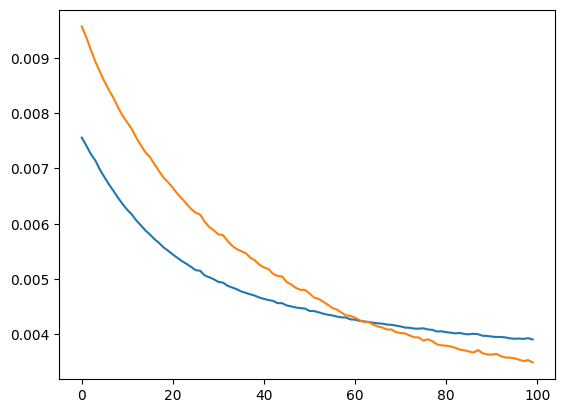

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])